# The unique distribution of scalar_coupling_constant

When I first observed the distribution of the target variable. I noticed it wasn't a simple normal distribution. It appears that there are different "clusters" of values where the target value resides. Can we do something to itentify which "cluster" an observation appears in?

Looking at this closer, I have a hypothesis that we may see better results if we modeled certain "coupling types" independently.

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pylab as plt
plt.style.use('ggplot')
color_pal = [x['color'] for x in plt.rcParams['axes.prop_cycle']]

In [5]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
structures = pd.read_csv('../input/structures.csv')
ss = pd.read_csv('../input/sample_submission.csv')

# First, lets explore the distribution of the target
I feel that most of the time a histogram is the best way to get an understanding of a single feature.

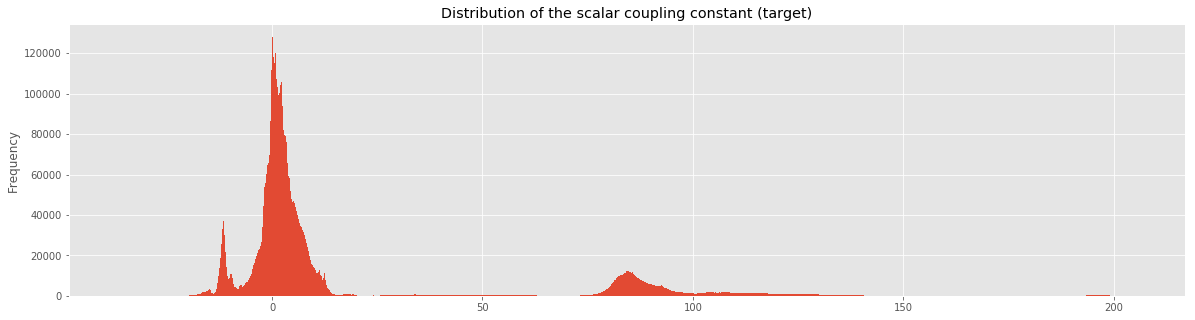

In [9]:
# Distribution of the target
train_df['scalar_coupling_constant'].plot(kind='hist', figsize=(20, 5), bins=1000, title='Distribution of the scalar coupling constant (target)')
plt.show()

## Plot Target by Observation Kind

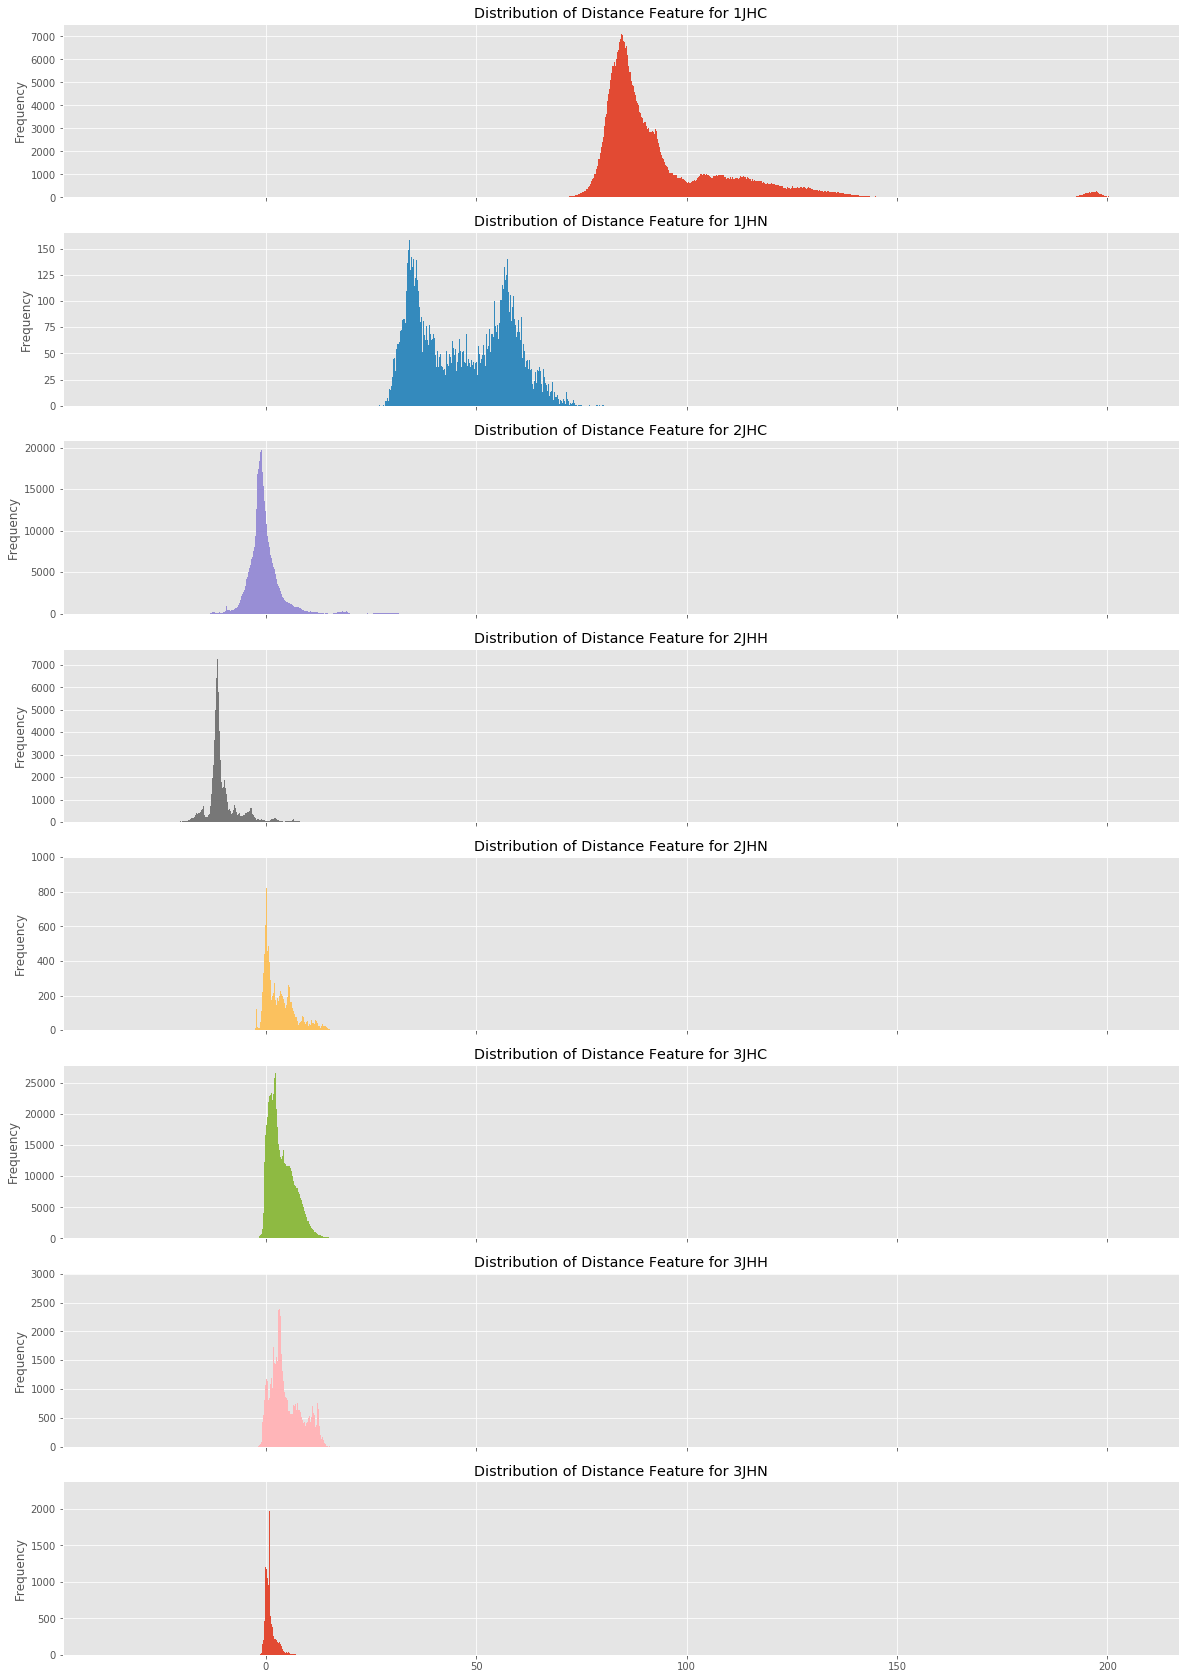

In [21]:
color_index = 0
axes_index = 0
fig, axes = plt.subplots(8, 1, figsize=(20, 30), sharex=True)
for mtype, d in train_df.groupby('type'):
    d['scalar_coupling_constant'].plot(kind='hist',
                  bins=1000,
                  title='Distribution of Distance Feature for {}'.format(mtype),
                  color=color_pal[color_index],
                  ax=axes[axes_index])
    if color_index == 6:
        color_index = 0
    else:
        color_index += 1
    axes_index += 1
plt.show()

## Distributions in the same plot.
It's pretty clear that the target is closely related to the type of coupling. All of the ~80+ `scalar_coupling_constant` values are type: 1JHC.

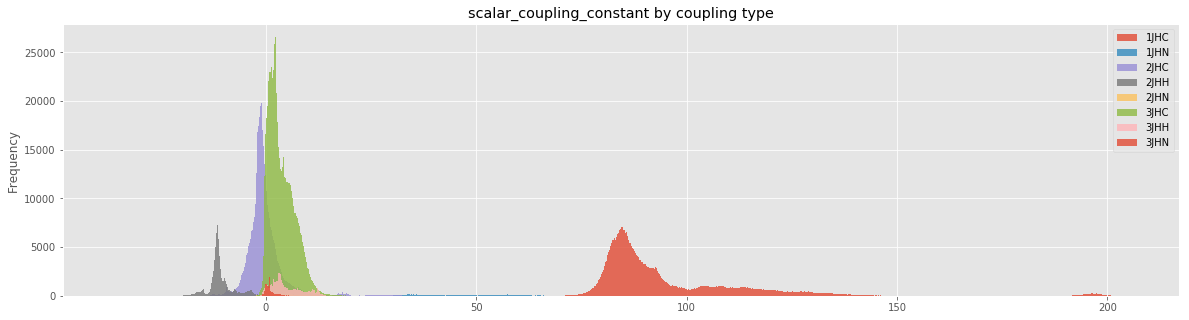

In [20]:
train_df.groupby('type')['scalar_coupling_constant'].plot(kind='hist',
                                                          bins=1000,
                                                          figsize=(20, 5),
                                                          alpha=0.8,
                                                         title='scalar_coupling_constant by coupling type')
plt.legend()
plt.show()

## Maybe we should we model each "type" independently?